In [19]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [20]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [21]:
X, y = mnist['data'], mnist['target']

In [22]:
X.shape

(1797, 64)

In [23]:
y.shape

(1797,)

As we can see, the data contains 1797 instances and number of attributes are 64, which corresponds to `8 x 8` pixel image.

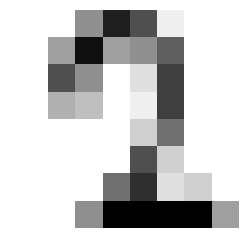

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[1400]
some_digit_image = some_digit.reshape(8,8)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
            interpolation="nearest")
plt.axis("off")
plt.show()

In [25]:
y[1400]

2

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(1437, 64)

In [28]:
X_test.shape

(360, 64)

### Making a binary classifier

In [29]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
sgd_clf.predict([some_digit])

array([ True])

### Measuring Accuray using Cross-validation

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.99164927, 0.99373695, 1.        ])

Making a "not-2" classifier

In [33]:
from sklearn.base import BaseEstimator
import numpy as np

class Never2Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [34]:
never_2_clf = Never2Classifier()
cross_val_score(never_2_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.90605428, 0.89979123, 0.89352818])

### Confusion Matrix

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[1291,    2],
       [   5,  139]], dtype=int64)

In [37]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_2, y_train_pred)

0.9858156028368794

In [38]:
recall_score(y_train_2, y_train_pred)

0.9652777777777778

In [39]:
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.9754385964912281

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1207.00707284])

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
#if threshold is 1500
threshold = 1500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [43]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,
                            method="decision_function")

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc="upper right")
    

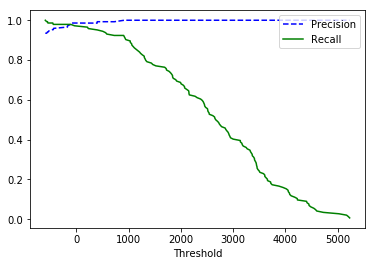

In [50]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [51]:
y_train_pred_80 = (y_scores > -1000)

In [52]:
precision_score(y_train_2, y_train_pred_80)

0.8372093023255814

In [53]:
recall_score(y_train_2, y_train_pred_80)

1.0